In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage


Populating the interactive namespace from numpy and matplotlib


In [2]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/mom025_ocean_grid.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
print(geolon_t.shape)

fh=fcor/ht
#print fh.shape

vgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/ocean.ncra501-520.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
print(st_ocean.shape)
print(potrho.shape)
print(yt_ocean.shape)

nc = Dataset('/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/output200/ocean.nc', mode='r') # file handle, open in read only mode
dzt = nc.variables['dzt'][0,:,:,:]
nc.close() # close the file


IOError: [Errno 2] No such file or directory: '/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/mom025_ocean_grid.nc'

In [ ]:
NYFCntrlDir = '/g/data1/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data1/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

In [ ]:

Ocean_File = os.path.join(NYFCntrlDir,'Tdim_output197*/ocean__*.nc')
print(Ocean_File)
np_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(np_cntrl.temp.shape)

Ocean_File = os.path.join(NYFCntrlDir,'output*/ocean__*.nc')
np_cntrl2=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print(np_cntrl2.temp.shape)


Ocean_File = os.path.join(NYFPertDir,'output*/ocean__*.nc')
print(Ocean_File)
np_pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print(np_pert.temp.shape) 


1497.5618896484375


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


2474.04296875


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


3508.633056640625


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


4555.56591796875


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


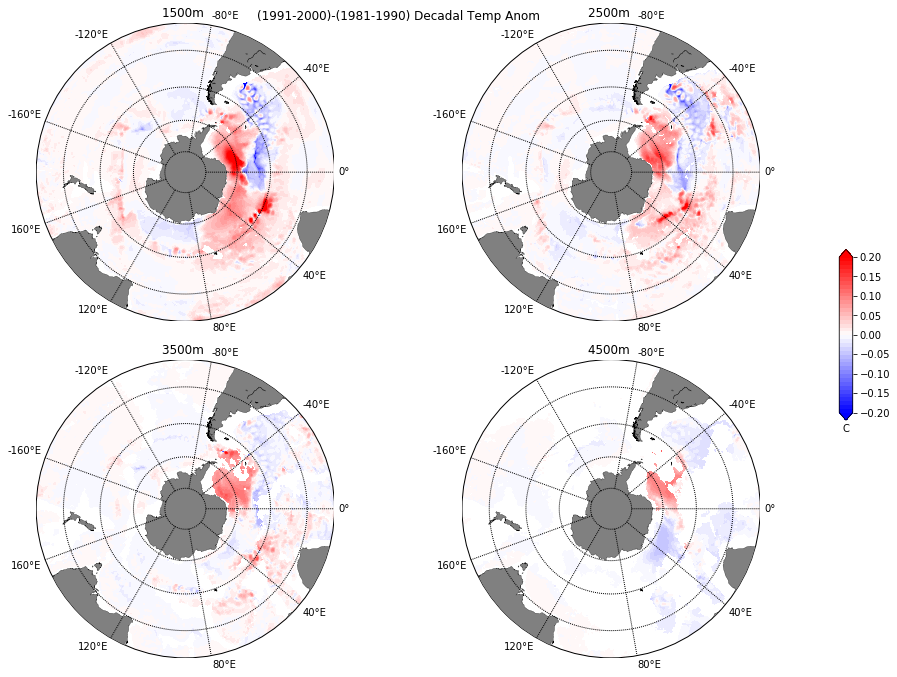

In [26]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.suptitle('(1991-2000)-(1981-1990) Decadal Temp Anom')
clev = np.arange(-.2,.21,.01)
#print clev

st=30
print(st_ocean[st])

var1=np_pert.temp[8:18,st,0:500,:].mean('Time').load()-np_cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var2=np_pert.temp[18:28,st,0:500,:].mean('Time').load()-np_cntrl2.temp[10:20,st,0:500,:].mean('Time').load()

plt.subplot(2,2,1)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1500m ')


st=35
print(st_ocean[st])
var1=np_pert.temp[8:18,st,0:500,:].mean('Time').load()-np_cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var2=np_pert.temp[18:28,st,0:500,:].mean('Time').load()-np_cntrl2.temp[10:20,st,0:500,:].mean('Time').load()

plt.subplot(2,2,2)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2500m ')

st=40
print(st_ocean[st])
var1=np_pert.temp[8:18,st,0:500,:].mean('Time').load()-np_cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var2=np_pert.temp[18:28,st,0:500,:].mean('Time').load()-np_cntrl2.temp[10:20,st,0:500,:].mean('Time').load()

plt.subplot(2,2,3)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('3500m ')

st=45
print(st_ocean[st])
var1=np_pert.temp[8:18,st,0:500,:].mean('Time').load()-np_cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var2=np_pert.temp[18:28,st,0:500,:].mean('Time').load()-np_cntrl2.temp[10:20,st,0:500,:].mean('Time').load()

plt.subplot(2,2,4)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('4500m ')

ax3 = plt.axes([0.99,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('C')

plt.tight_layout()

#of = os.path.join(NYFPertDir,'Decadal_Tanom_Zs.png')
#plt.savefig(of,dpi=220)

#ax3 = plt.axes([0.92,0.38,0.015,0.25])

In [11]:
i=1000 
j=150

print('temp',np_pert.temp[0,33:50,j,i].load())
print('dzt',dzt[33:50,j,i])
print('dzt ma sum ',np.ma.sum(dzt[33:50,j,i],axis=0))
print('dzt sum ',np.sum(dzt[33:50,j,i],axis=0))

print('temp*dzt: ',np_pert.temp[0,33:50,j,i].load()*dzt[33:50,j,i])
print('sum ma temp*dzt: ',np.ma.sum(np_pert.temp[0,33:50,j,i].load()*dzt[33:50,j,i],axis=0))
print('sum temp*dzt: ',np.sum(np_pert.temp[0,33:50,j,i].load()*dzt[33:50,j,i],axis=0))


print('avg temp*dzt/sum(dzt): ',np.sum(np_pert.temp[0,33:50,j,i].load()*dzt[33:50,j,i],axis=0)/np.sum(dzt[33:50,j,i],axis=0))


temp <xarray.DataArray 'temp' (st_ocean: 17)>
array([-0.618556, -0.6177  , -0.617209, -0.616081, -0.6153  , -0.614783,
       -0.614943, -0.619248, -0.6215  , -0.621396, -0.621328, -0.621989,
       -0.626686, -0.627236,       nan,       nan,       nan], dtype=float32)
Coordinates:
    xt_ocean  float64 -29.88
    yt_ocean  float64 -65.24
  * st_ocean  (st_ocean) float64 2.071e+03 2.271e+03 ... 5.185e+03 5.395e+03
    Time      float64 6.333e+04
Attributes:
    long_name:      Potential temperature
    units:          degrees C
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_water_potential_temperature
dzt [198.1728515625 201.29940795898438 203.6198272705078 205.3294677734375
 206.58131408691406 207.49493408203125 208.15867614746094 208.640869140625
 208.9900665283203 209.2423858642578 209.4254150390625 209.5571746826172
 209.65235900878906 201.0495300292968

In [6]:
#depth average between 2000-4000m and below 4000m, Fig 3 of Purkey et al., 2016.
#calculate linear ocean warming trends spanning 1981 to 2016
dst=np.zeros(50)
dst[1:50]=np.diff(st_ocean)
dst[0]=st_ocean[0]
#print dst.shape

#depth integrate from 2000-4000 and 4000:
print(st_ocean[0:27])
print(st_ocean[27:43])
print(st_ocean[43:50])


#print pert.temp.shape
pT_0to1=np.zeros((np_pert.temp.shape[0],np_pert.temp.shape[2],np_pert.temp.shape[3]))
#pT_2to4=np.zeros((np_pert.temp.shape[0],np_pert.temp.shape[2],np_pert.temp.shape[3]))
#pT_4to6=np.zeros((np_pert.temp.shape[0],np_pert.temp.shape[2],np_pert.temp.shape[3]))
#print pT_2to4.shape

for t in range(np_pert.temp.shape[0]):
    print(t)
    
    pT_0to1[t,:,:]=np.sum(np_pert.temp[t,0:27,:,:].load()*dzt[0:27,:,:],axis=0)/np.sum(dzt[0:27,:,:],axis=0)
    #pT_2to4[t,:,:]=np.sum(np_pert.temp[t,27:43,:,:].load()*dzt[27:43,:,:],axis=0)/np.sum(dzt[27:43,:,:],axis=0)
    #pT_4to6[t,:,:]=np.sum(np_pert.temp[t,43:50,:,:].load()*dzt[43:50,:,:],axis=0)/np.sum(dzt[43:50,:,:],axis=0)
    
print(pT_0to1.shape)
of=os.path.join(NYFPertDir,'pT_0to1.npy')
a=np.save(of,pT_0to1)

#print(pT_2to4.shape)
#of=os.path.join(NYFPertDir,'pT_1to4.npy')
#a=np.save(of,pT_2to4)

#print(pT_4to6.shape)
#of=os.path.join(NYFPertDir,'pT_4to6.npy')
#a=np.save(of,pT_4to6)    


[  5.03354979  15.10064983  25.21935081  35.35845184  45.57635117
  55.8532486   66.26174927  76.80284882  87.57695007  98.62325287
 110.09615326 122.10665131 134.90855408 148.74664307 164.05375671
 181.31245422 201.26295471 224.7772522  253.06814575 287.55084229
 330.00775146 382.36505127 446.72634888 524.98242188 618.703125
 728.69207764 854.99353027]
[ 996.715271   1152.37609863 1319.9967041  1497.56188965 1683.05725098
 1874.78820801 2071.25195312 2271.32324219 2474.04296875 2678.75708008
 2884.89794922 3092.1171875  3300.0859375  3508.63305664 3717.56713867
 3926.81274414]
[4136.25146484 4345.86376953 4555.56591797 4765.36865234 4975.20947266
 5185.11083984 5395.02294922]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
(44, 1080, 1440)


In [9]:
#depth average between 2000-4000m and below 4000m, Fig 3 of Purkey et al., 2016.
#calculate linear ocean warming trends spanning 1981 to 2016

#depth integrate from 2000-4000 and 4000:
#print st_ocean[33:43]
#print st_ocean[43:50]

#print cntrl.temp.shape
#print cntrl2.temp.shape
cT_0to1=np.zeros((49,np_cntrl.temp.shape[2],np_cntrl.temp.shape[3]))
#cT_2to4=np.zeros((49,np_cntrl.temp.shape[2],np_cntrl.temp.shape[3]))
#cT_4to6=np.zeros((49,np_cntrl.temp.shape[2],np_cntrl.temp.shape[3]))
#print(cT_2to4.shape)


for t in range(49):
    print(t)
    
    if t<9:
        cT_0to1[t,:,:]=np.sum(np_cntrl.temp[t,0:27,:,:].load()*dzt[0:27,:,:],axis=0)/np.sum(dzt[0:27,:,:],axis=0)
        #cT_2to4[t,:,:]=np.sum(np_cntrl.temp[t,27:43,:,:].load()*dzt[27:43,:,:],axis=0)/np.sum(dzt[27:43,:,:],axis=0)
        #cT_4to6[t,:,:]=np.sum(np_cntrl.temp[t,43:50,:,:].load()*dzt[43:50,:,:],axis=0)/np.sum(dzt[43:50,:,:],axis=0)
    else:
        cT_0to1[t,:,:]=np.sum(np_cntrl2.temp[t-9,0:27,:,:].load()*dzt[0:27,:,:],axis=0)/np.sum(dzt[0:27,:,:],axis=0)
        #cT_2to4[t,:,:]=np.sum(np_cntrl2.temp[t-9,27:43,:,:].load()*dzt[27:43,:,:],axis=0)/np.sum(dzt[27:43,:,:],axis=0)
        #cT_4to6[t,:,:]=np.sum(np_cntrl2.temp[t-9,43:50,:,:].load()*dzt[43:50,:,:],axis=0)/np.sum(dzt[43:50,:,:],axis=0)
    
#print cT_2to4.shape
of=os.path.join(NYFCntrlDir,'cT_0to1.npy')
a=np.save(of,cT_0to1)

#print cT_2to4.shape
#of=os.path.join(NYFCntrlDir,'cT_1to4.npy')
#a=np.save(of,cT_2to4)

#print cT_4to6.shape
#of=os.path.join(NYFCntrlDir,'cT_4to6.npy')
#a=np.save(of,cT_4to6) 


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [4]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

of=os.path.join(NYFCntrlDir,'cT_0to1.npy')
np_cT_0to1=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_1to4.npy')
np_cT_1to4=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_2to4.npy')
np_cT_2to4=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_4to6.npy')
np_cT_4to6=np.load(of)  

print(np_cT_0to1.shape)
print(np_cT_1to4.shape)
print(np_cT_4to6.shape)

of=os.path.join(NYFPertDir,'pT_0to1.npy')
np_pT_0to1=np.load(of)

of=os.path.join(NYFPertDir,'pT_1to4.npy')
np_pT_1to4=np.load(of)

of=os.path.join(NYFPertDir,'pT_2to4.npy')
np_pT_2to4=np.load(of)

of=os.path.join(NYFPertDir,'pT_4to6.npy')
np_pT_4to6=np.load(of)  

print(np_pT_0to1.shape)
print(np_pT_1to4.shape)
print(np_pT_4to6.shape)


(49, 1080, 1440)
(49, 1080, 1440)
(49, 1080, 1440)
(44, 1080, 1440)
(44, 1080, 1440)
(44, 1080, 1440)


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


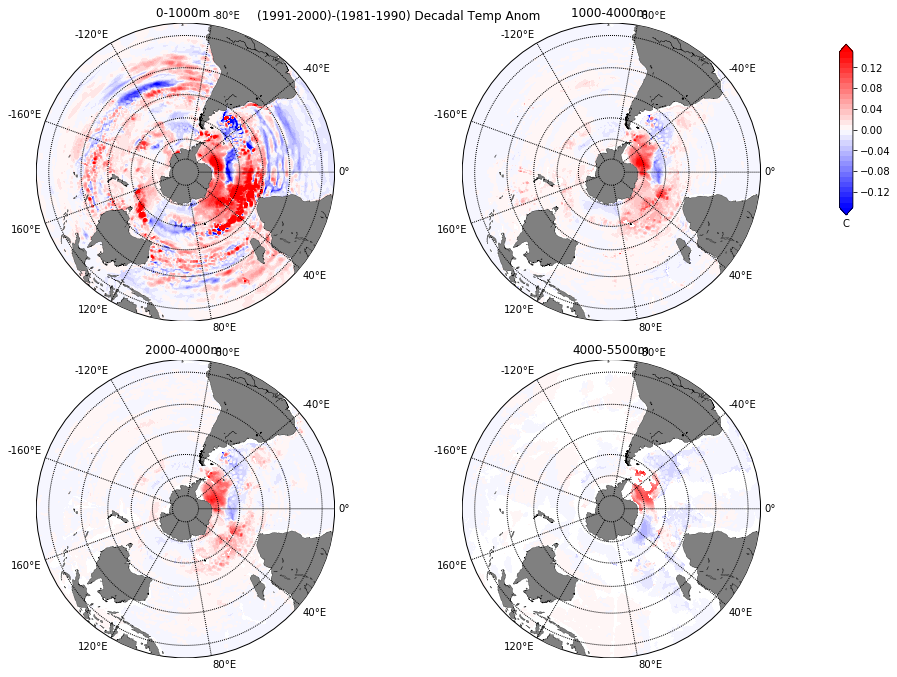

In [5]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.suptitle('(1991-2000)-(1981-1990) Decadal Temp Anom')

clev = np.arange(-.15,.16,.01)
#print clev

cyrs=np.arange(1971,2017,1)
#print cyrs[10:20]
pyrs=np.arange(1973,2017,1)
#print pyrs[8:18]

var1=np.mean(np_cT_0to1[10:20,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var2=np.mean(np_cT_0to1[20:30,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var3=np.mean(np_pT_0to1[8:18,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var4=np.mean(np_pT_0to1[18:28,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()

plt.subplot(2,2,1)
map = Basemap(projection='spstere',boundinglat=0,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(var4-var2)-(var3-var1), cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('0-1000m ')

var1=np.mean(np_cT_1to4[10:20,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var2=np.mean(np_cT_1to4[20:30,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var3=np.mean(np_pT_1to4[8:18,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var4=np.mean(np_pT_1to4[18:28,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()

plt.subplot(2,2,2)
map = Basemap(projection='spstere',boundinglat=0,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(var4-var2)-(var3-var1), cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1000-4000m ')

var1=np.mean(np_cT_2to4[10:20,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var2=np.mean(np_cT_2to4[20:30,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var3=np.mean(np_pT_2to4[8:18,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var4=np.mean(np_pT_2to4[18:28,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()

plt.subplot(2,2,3)
map = Basemap(projection='spstere',boundinglat=0,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(var4-var2)-(var3-var1), cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2000-4000m ')

ax3 = plt.axes([0.99,0.68,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('C')

var1=np.mean(np_cT_4to6[10:20,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var2=np.mean(np_cT_4to6[20:30,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var3=np.mean(np_pT_4to6[8:18,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()
var4=np.mean(np_pT_4to6[18:28,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Time').load()


plt.subplot(2,2,4)
map = Basemap(projection='spstere',boundinglat=0,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(var4-var2)-(var3-var1),cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('4000-5500m')

plt.tight_layout()

#of = os.path.join(NYFPertDir,'Tanom_decadal_Eq.png')
#plt.savefig(of,dpi=220)

#ax3 = plt.axes([0.92,0.38,0.015,0.25])

In [6]:
#calc dT/dt
cyrs=np.arange(1971,2017,1)
pyrs=np.arange(1973,2017,1)

#calc linear trend in C/s since 1981-2000 (8 years from 1973) 
print(cyrs[10:30])
print(pyrs[8:28])

print(cyrs[30:46])
print(pyrs[28:44])

np_tr81to00_pT_0to1=np.zeros((500,1440))
np_tr81to00_cT_0to1=np.zeros((500,1440))
np_tr81to00_pT_1to4=np.zeros((500,1440))
np_tr81to00_cT_1to4=np.zeros((500,1440))
np_tr81to00_pT_4to6=np.zeros((500,1440))
np_tr81to00_cT_4to6=np.zeros((500,1440))

np_tr00to17_pT_0to1=np.zeros((500,1440))
np_tr00to17_cT_0to1=np.zeros((500,1440))
np_tr00to17_pT_1to4=np.zeros((500,1440))
np_tr00to17_cT_1to4=np.zeros((500,1440))
np_tr00to17_pT_4to6=np.zeros((500,1440))
np_tr00to17_cT_4to6=np.zeros((500,1440))

np_tr81to17_pT_0to1=np.zeros((500,1440))
np_tr81to17_cT_0to1=np.zeros((500,1440))
np_tr81to17_pT_1to4=np.zeros((500,1440))
np_tr81to17_cT_1to4=np.zeros((500,1440))
np_tr81to17_pT_4to6=np.zeros((500,1440))
np_tr81to17_cT_4to6=np.zeros((500,1440))


for j in range(0,500):
    #print j
    
    np_tr81to00_pT_0to1[j,:]=np.polyfit(range(20), np_pT_0to1[8:28,j,:],1)[0,:]
    np_tr81to00_cT_0to1[j,:]=np.polyfit(range(20), np_cT_0to1[10:30,j,:],1)[0,:]
    
    np_tr00to17_pT_0to1[j,:]=np.polyfit(range(16), np_pT_0to1[28:44,j,:],1)[0,:]
    np_tr00to17_cT_0to1[j,:]=np.polyfit(range(16), np_cT_0to1[30:46,j,:],1)[0,:]
    
    np_tr81to17_pT_0to1[j,:]=np.polyfit(range(36), np_pT_0to1[8:44,j,:],1)[0,:]
    np_tr81to17_cT_0to1[j,:]=np.polyfit(range(36), np_cT_0to1[10:46,j,:],1)[0,:]
    
    np_tr81to00_pT_1to4[j,:]=np.polyfit(range(20), np_pT_1to4[8:28,j,:],1)[0,:]
    np_tr81to00_cT_1to4[j,:]=np.polyfit(range(20), np_cT_1to4[10:30,j,:],1)[0,:]
    
    np_tr00to17_pT_1to4[j,:]=np.polyfit(range(16), np_pT_1to4[28:44,j,:],1)[0,:]
    np_tr00to17_cT_1to4[j,:]=np.polyfit(range(16), np_cT_1to4[30:46,j,:],1)[0,:]
    
    np_tr81to17_pT_1to4[j,:]=np.polyfit(range(36), np_pT_1to4[8:44,j,:],1)[0,:]
    np_tr81to17_cT_1to4[j,:]=np.polyfit(range(36), np_cT_1to4[10:46,j,:],1)[0,:]

    np_tr81to00_pT_4to6[j,:]=np.polyfit(range(20), np_pT_4to6[8:28,j,:],1)[0,:]
    np_tr81to00_cT_4to6[j,:]=np.polyfit(range(20), np_cT_4to6[10:30,j,:],1)[0,:]    
    
    np_tr00to17_pT_4to6[j,:]=np.polyfit(range(16), np_pT_4to6[28:44,j,:],1)[0,:]
    np_tr00to17_cT_4to6[j,:]=np.polyfit(range(16), np_cT_4to6[30:46,j,:],1)[0,:]

    np_tr81to17_pT_4to6[j,:]=np.polyfit(range(36), np_pT_4to6[8:44,j,:],1)[0,:]
    np_tr81to17_cT_4to6[j,:]=np.polyfit(range(36), np_cT_4to6[10:46,j,:],1)[0,:]

    

[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000]
[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000]
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]


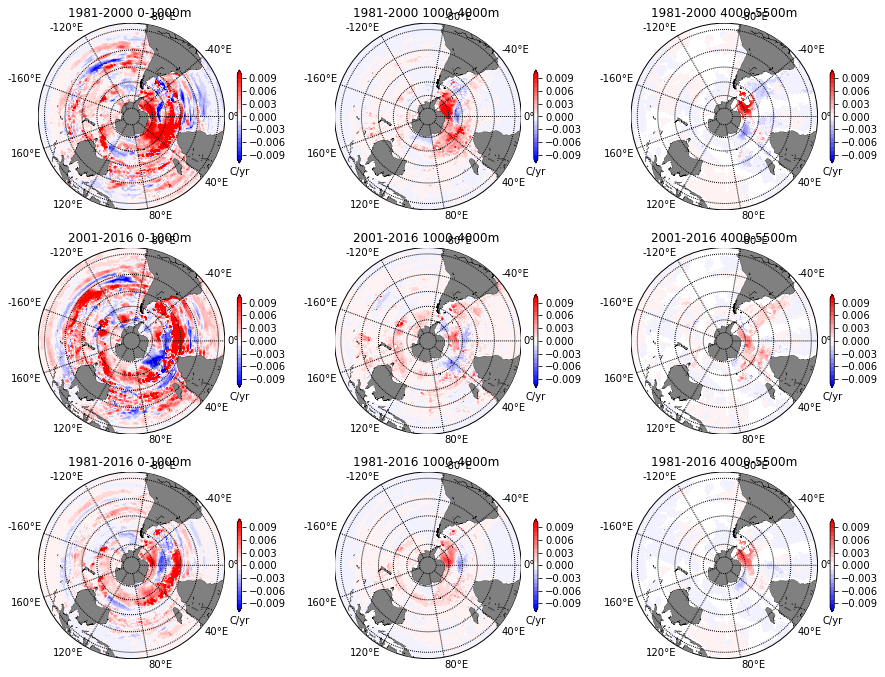

In [7]:
#plot dT/dt K/yr heating trend
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('(1991-2000)-(1981-1990) Decadal Temp Anom')

clev = np.arange(-.01,.011,.001)
#print clev


clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,1)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to00_pT_0to1-np_tr81to00_cT_0to1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 0-1000m ')


plt.subplot(3,3,2)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to00_pT_1to4-np_tr81to00_cT_1to4, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 1000-4000m ')

#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

clev = np.arange(-.01,.011,.001)

plt.subplot(3,3,3)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to00_pT_4to6-np_tr81to00_cT_4to6,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 4000-5500m')

clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,4)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr00to17_pT_0to1-np_tr00to17_cT_0to1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2001-2016 0-1000m ')

clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,5)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr00to17_pT_1to4-np_tr00to17_cT_1to4, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2001-2016 1000-4000m ')

#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

clev = np.arange(-.01,.011,.001)

plt.subplot(3,3,6)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr00to17_pT_4to6-np_tr00to17_cT_4to6,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2001-2016 4000-5500m')
          
#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')


clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,7)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to17_pT_0to1-np_tr81to17_cT_0to1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2016 0-1000m ')


clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,8)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to17_pT_1to4-np_tr81to17_cT_1to4, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2016 1000-4000m ')

#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

clev = np.arange(-.01,.011,.001)

plt.subplot(3,3,9)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to17_pT_4to6-np_tr81to17_cT_4to6,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2016 4000-5500m')
          
#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

plt.tight_layout()




In [3]:
NYFCntrlDir = '/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'

In [4]:

Ocean_File = os.path.join(NYFCntrlDir,'output*/ocean__*.nc')
print(Ocean_File)
nonp_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print(nonp_cntrl.temp.shape)

Ocean_File = os.path.join(NYFPertDir,'output*/ocean__*.nc')
nonp_pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print(nonp_pert.temp.shape)

/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/output*/ocean__*.nc
(50, 50, 1080, 1440)
(44, 50, 1080, 1440)


In [6]:
#depth average between 1000-4000m and below 4000m, Fig 3 of Purkey et al., 2016.
#calculate linear ocean warming trends spanning 1981 to 2016
dst=np.zeros(50)
dst[1:50]=np.diff(st_ocean)
dst[0]=st_ocean[0]
print(dst.shape)

#depth integrate from 1000-4000 and 4000:

print(st_ocean[27:43])
print(st_ocean[43:50])


print(nonp_pert.temp.shape)
nonp_pT_0to1=np.zeros((nonp_pert.temp.shape[0],nonp_pert.temp.shape[2],nonp_pert.temp.shape[3]))
nonp_pT_1to4=np.zeros((nonp_pert.temp.shape[0],nonp_pert.temp.shape[2],nonp_pert.temp.shape[3]))
nonp_pT_4to6=np.zeros((nonp_pert.temp.shape[0],nonp_pert.temp.shape[2],nonp_pert.temp.shape[3]))
print(nonp_pT_1to4.shape)

for t in range(nonp_pert.temp.shape[0]):
    print(t)
    
    nonp_pT_0to1[t,:,:]=np.sum(nonp_pert.temp[t,0:27,:,:].load()*dzt[0:27,:,:],axis=0)/np.sum(dzt[0:27,:,:],axis=0)
    nonp_pT_1to4[t,:,:]=np.sum(nonp_pert.temp[t,27:43,:,:].load()*dzt[27:43,:,:],axis=0)/np.sum(dzt[27:43,:,:],axis=0)
    nonp_pT_4to6[t,:,:]=np.sum(nonp_pert.temp[t,43:50,:,:].load()*dzt[43:50,:,:],axis=0)/np.sum(dzt[43:50,:,:],axis=0)
    
of=os.path.join('/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/','pT_0to1.npy')
a=np.save(of,nonp_pT_0to1)
of=os.path.join('/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/','pT_1to4.npy')
a=np.save(of,nonp_pT_1to4)
of=os.path.join('/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/','pT_4to6.npy')
a=np.save(of,nonp_pT_4to6)





(50,)
[ 996.715271   1152.37609863 1319.9967041  1497.56188965 1683.05725098
 1874.78820801 2071.25195312 2271.32324219 2474.04296875 2678.75708008
 2884.89794922 3092.1171875  3300.0859375  3508.63305664 3717.56713867
 3926.81274414]
[4136.25146484 4345.86376953 4555.56591797 4765.36865234 4975.20947266
 5185.11083984 5395.02294922]
(44, 50, 1080, 1440)
(44, 1080, 1440)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [7]:
print(nonp_cntrl.temp.shape)
nonp_cT_0to1=np.zeros((nonp_cntrl.temp.shape[0],nonp_cntrl.temp.shape[2],nonp_cntrl.temp.shape[3]))
nonp_cT_1to4=np.zeros((nonp_cntrl.temp.shape[0],nonp_cntrl.temp.shape[2],nonp_cntrl.temp.shape[3]))
nonp_cT_4to6=np.zeros((nonp_cntrl.temp.shape[0],nonp_cntrl.temp.shape[2],nonp_cntrl.temp.shape[3]))
print(nonp_cT_1to4.shape)

for t in range(0,50): #nonp_cntrl.temp.shape[0]):
    print(t)
    
    if(t==4): #deal wit corrupt t==4 file
        nonp_cT_0to1[t,:,:]=np.sum(nonp_cntrl.temp[t-1,0:27,:,:].load()*dzt[0:27,:,:],axis=0)/np.sum(dzt[0:27,:,:],axis=0)
        nonp_cT_1to4[t,:,:]=np.sum(nonp_cntrl.temp[t-1,27:43,:,:].load()*dzt[27:43,:,:],axis=0)/np.sum(dzt[27:43,:,:],axis=0)
        nonp_cT_4to6[t,:,:]=np.sum(nonp_cntrl.temp[t-1,43:50,:,:].load()*dzt[43:50,:,:],axis=0)/np.sum(dzt[43:50,:,:],axis=0)
    else:
        nonp_cT_0to1[t,:,:]=np.sum(nonp_cntrl.temp[t,0:27,:,:].load()*dzt[0:27,:,:],axis=0)/np.sum(dzt[0:27,:,:],axis=0)
        nonp_cT_1to4[t,:,:]=np.sum(nonp_cntrl.temp[t,27:43,:,:].load()*dzt[27:43,:,:],axis=0)/np.sum(dzt[27:43,:,:],axis=0)
        nonp_cT_4to6[t,:,:]=np.sum(nonp_cntrl.temp[t,43:50,:,:].load()*dzt[43:50,:,:],axis=0)/np.sum(dzt[43:50,:,:],axis=0)
    
of=os.path.join('/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/','cT_0to1.npy')
a=np.save(of,nonp_cT_0to1)
of=os.path.join('/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/','cT_1to4.npy')
a=np.save(of,nonp_cT_1to4)
of=os.path.join('/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/','cT_4to6.npy')
a=np.save(of,nonp_cT_4to6)


(50, 50, 1080, 1440)
(50, 1080, 1440)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [6]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'

of=os.path.join(NYFCntrlDir,'cT_0to1.npy')
nonp_cT_0to1=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_1to4.npy')
nonp_cT_1to4=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_4to6.npy')
nonp_cT_4to6=np.load(of)  

print(nonp_cT_1to4.shape)
print(nonp_cT_4to6.shape)

of=os.path.join(NYFPertDir,'pT_0to1.npy')
nonp_pT_0to1=np.load(of)

of=os.path.join(NYFPertDir,'pT_1to4.npy')
nonp_pT_1to4=np.load(of)

of=os.path.join(NYFPertDir,'pT_4to6.npy')
nonp_pT_4to6=np.load(of)  

print(nonp_pT_1to4.shape)
print(nonp_pT_4to6.shape)


(50, 1080, 1440)
(50, 1080, 1440)
(44, 1080, 1440)
(44, 1080, 1440)


In [9]:
#calc dT/dt
#cyrs=np.arange(1970,2017,1)
pyrs=np.arange(1973,2017,1)

#calc linear trend in C/s since 1981-2000 (8 years from 1973) 
#print cyrs[11:31]
print(pyrs[8:28])
print(pyrs[28:44])

wp_os=3

nonp_tr81to00_pT_0to1=np.zeros((500,1440))
nonp_tr81to00_cT_0to1=np.zeros((500,1440))
nonp_tr81to00_pT_1to4=np.zeros((500,1440))
nonp_tr81to00_cT_1to4=np.zeros((500,1440))
nonp_tr81to00_pT_4to6=np.zeros((500,1440))
nonp_tr81to00_cT_4to6=np.zeros((500,1440))

nonp_tr00to17_pT_0to1=np.zeros((500,1440))
nonp_tr00to17_cT_0to1=np.zeros((500,1440))
nonp_tr00to17_pT_1to4=np.zeros((500,1440))
nonp_tr00to17_cT_1to4=np.zeros((500,1440))
nonp_tr00to17_pT_4to6=np.zeros((500,1440))
nonp_tr00to17_cT_4to6=np.zeros((500,1440))

nonp_tr81to17_pT_0to1=np.zeros((500,1440))
nonp_tr81to17_cT_0to1=np.zeros((500,1440))
nonp_tr81to17_pT_1to4=np.zeros((500,1440))
nonp_tr81to17_cT_1to4=np.zeros((500,1440))
nonp_tr81to17_pT_4to6=np.zeros((500,1440))
nonp_tr81to17_cT_4to6=np.zeros((500,1440))


for j in range(0,500):
    #print j
    
    nonp_tr81to00_pT_0to1[j,:]=np.polyfit(range(20), nonp_pT_0to1[8:28,j,:],1)[0,:]
    nonp_tr81to00_cT_0to1[j,:]=np.polyfit(range(20), nonp_cT_0to1[10:30,j,:],1)[0,:]
    
    nonp_tr00to17_pT_0to1[j,:]=np.polyfit(range(16), nonp_pT_0to1[28:44,j,:],1)[0,:]
    nonp_tr00to17_cT_0to1[j,:]=np.polyfit(range(16), nonp_cT_0to1[30:46,j,:],1)[0,:]
    
    nonp_tr81to17_pT_0to1[j,:]=np.polyfit(range(36), nonp_pT_0to1[8:44,j,:],1)[0,:]
    nonp_tr81to17_cT_0to1[j,:]=np.polyfit(range(36), nonp_cT_0to1[10:46,j,:],1)[0,:]
    
    nonp_tr81to00_pT_1to4[j,:]=np.polyfit(range(20), nonp_pT_1to4[8:28,j,:],1)[0,:]
    nonp_tr81to00_cT_1to4[j,:]=np.polyfit(range(20), nonp_cT_1to4[10:30,j,:],1)[0,:]
    
    nonp_tr00to17_pT_1to4[j,:]=np.polyfit(range(16), nonp_pT_1to4[28:44,j,:],1)[0,:]
    nonp_tr00to17_cT_1to4[j,:]=np.polyfit(range(16), nonp_cT_1to4[30:46,j,:],1)[0,:]
    
    nonp_tr81to17_pT_1to4[j,:]=np.polyfit(range(36), nonp_pT_1to4[8:44,j,:],1)[0,:]
    nonp_tr81to17_cT_1to4[j,:]=np.polyfit(range(36), nonp_cT_1to4[10:46,j,:],1)[0,:]

    nonp_tr81to00_pT_4to6[j,:]=np.polyfit(range(20), nonp_pT_4to6[8:28,j,:],1)[0,:]
    nonp_tr81to00_cT_4to6[j,:]=np.polyfit(range(20), nonp_cT_4to6[10:30,j,:],1)[0,:]    
    
    nonp_tr00to17_pT_4to6[j,:]=np.polyfit(range(16), nonp_pT_4to6[28:44,j,:],1)[0,:]
    nonp_tr00to17_cT_4to6[j,:]=np.polyfit(range(16), nonp_cT_4to6[30:46,j,:],1)[0,:]

    nonp_tr81to17_pT_4to6[j,:]=np.polyfit(range(36), nonp_pT_4to6[8:44,j,:],1)[0,:]
    nonp_tr81to17_cT_4to6[j,:]=np.polyfit(range(36), nonp_cT_4to6[10:46,j,:],1)[0,:]


[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000]
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]


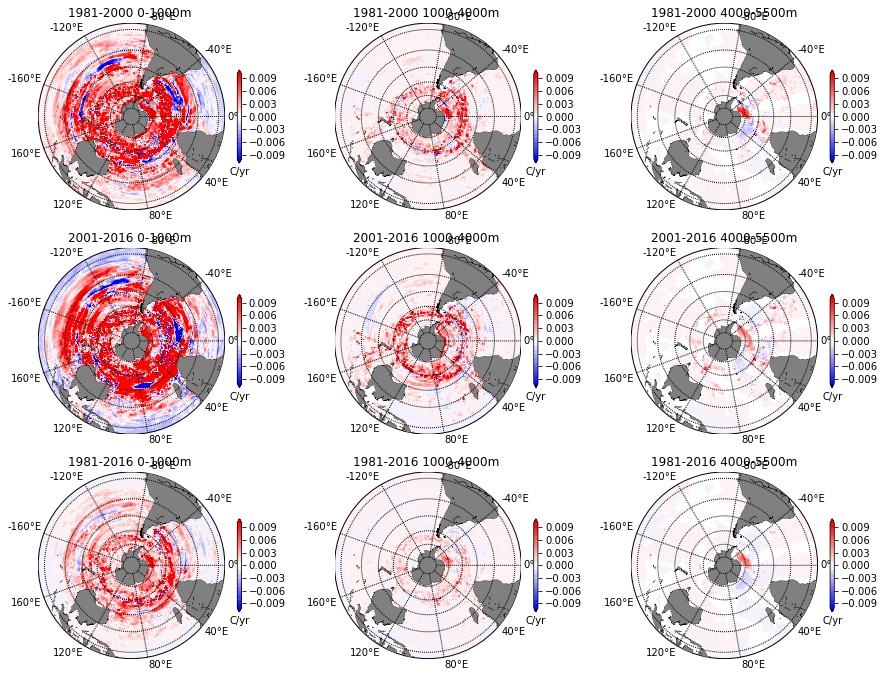

In [10]:
#plot dT/dt K/yr heating trend
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('(1991-2000)-(1981-1990) Decadal Temp Anom')

clev = np.arange(-.01,.011,.001)
#print clev


clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,1)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr81to00_pT_0to1-nonp_tr81to00_cT_0to1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 0-1000m ')


plt.subplot(3,3,2)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr81to00_pT_1to4-nonp_tr81to00_cT_1to4, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 1000-4000m ')

#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

clev = np.arange(-.01,.011,.001)

plt.subplot(3,3,3)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr81to00_pT_4to6-nonp_tr81to00_cT_4to6,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 4000-5500m')

clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,4)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr00to17_pT_0to1-nonp_tr00to17_cT_0to1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2001-2016 0-1000m ')

clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,5)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr00to17_pT_1to4-nonp_tr00to17_cT_1to4, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2001-2016 1000-4000m ')

#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

clev = np.arange(-.01,.011,.001)

plt.subplot(3,3,6)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr00to17_pT_4to6-nonp_tr00to17_cT_4to6,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2001-2016 4000-5500m')
          
#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')


clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,7)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr81to17_pT_0to1-nonp_tr81to17_cT_0to1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2016 0-1000m ')


clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,8)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr81to17_pT_1to4-nonp_tr81to17_cT_1to4, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2016 1000-4000m ')

#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

clev = np.arange(-.01,.011,.001)

plt.subplot(3,3,9)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr81to17_pT_4to6-nonp_tr81to17_cT_4to6,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2016 4000-5500m')
          
#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

plt.tight_layout()

In [5]:
#load gmoc in rho space
#NYFCntrlDir = '/g/data3/hh5/tmp/cosima/mom01v5/kds75_cp/'
#NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/'
NYFCntrlDir = '/g/data3/hh5/tmp/pas561/kds75_cp_ann/store_ext/'
NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/store_ext/'

#Ocean_File = os.path.join(NYFPertDir,'output*/ocean.nc')
#print Ocean_File
#pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
#print pert.ty_trans_rho.shape

#vgrid_file ='/g/data/v45/pas561/mom/archive/VertOverturn/kds75.uvwt.230-257.ncra.nc'
#nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
#yt_ocean2 = nc.variables['yt_ocean'][:]
#yu_ocean2 = nc.variables['yu_ocean'][:]
#xt_ocean2 = nc.variables['xt_ocean'][:]
#xu_ocean2 = nc.variables['xu_ocean'][:]
#st_ocean2 = nc.variables['st_ocean'][:]
#dzt2 = nc.variables['dzt'][:]
#potrho = nc.variables['potrho'][:]
#nc.close() # close the file
#print potrho.shape
#print yu_ocean.shape

vgrid_file ='/g/data/hh5/tmp/pas561/kds75_cp_ann/ocean_130.nc'
nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yt_ocean2 = nc.variables['yt_ocean'][:]
yu_ocean2 = nc.variables['yu_ocean'][:]
xt_ocean2 = nc.variables['xt_ocean'][:]
xu_ocean2 = nc.variables['xu_ocean'][:]
st_ocean2 = nc.variables['st_ocean'][:]
#dzt2 = nc.variables['dzt'][:]
#potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print potrho.shape
#print yu_ocean.shape


hgrid_file ='/g/data/hh5/tmp/pas561/mom01_unmasked_ocean_grid.nc'
# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t2 = nc.variables['geolon_t'][:]
geolat_t2 = nc.variables['geolat_t'][:]
nc.close() # close the file



#fix this to a 12 month average
nc = Dataset('/g/data/hh5/tmp/pas561/kds75_cp/dzt.9month.nc', mode='r') # file handle, open in read only mode
dzt2 = nc.variables['dzt'][:]
nc.close() # close the file
#print dzt.shape

#hgrid_file ='/g/data/v45/pas561/mom/archive/VertOverturn/mom01_unmasked_ocean_grid.nc'
## Extract the variables
#nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
#geolon_t2 = nc.variables['geolon_t'][:]
#geolat_t2 = nc.variables['geolat_t'][:]
#nc.close() # close the file


In [6]:
Ocean_File = os.path.join(NYFCntrlDir,'ocean_*.nc')
print(Ocean_File)
mom01_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(mom01_cntrl.temp.shape)

Ocean_File = os.path.join(NYFPertDir,'ocean_*.nc')
print(Ocean_File)
mom01_pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(mom01_pert.temp.shape)

/g/data3/hh5/tmp/pas561/kds75_cp_ann/store_ext/ocean_*.nc
(15, 75, 1351, 3600)
/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/store_ext/ocean_*.nc
(14, 75, 1351, 3600)


In [7]:
#depth average between 1000-4000m and below 4000m, Fig 3 of Purkey et al., 2016.
#calculate linear ocean warming trends spanning 1981 to 2016

#depth integrate from 1000-4000 and 4000:

print(st_ocean2.shape)
print(st_ocean2[0:46])
print(st_ocean2[46:66])
print(st_ocean2[66:75])

print(mom01_pert.temp.shape)
mom01_pT_0to1=np.zeros((mom01_pert.temp.shape[0],mom01_pert.temp.shape[2],mom01_pert.temp.shape[3]))
mom01_pT_1to4=np.zeros((mom01_pert.temp.shape[0],mom01_pert.temp.shape[2],mom01_pert.temp.shape[3]))
mom01_pT_4to6=np.zeros((mom01_pert.temp.shape[0],mom01_pert.temp.shape[2],mom01_pert.temp.shape[3]))
print(mom01_pT_1to4.shape)

for t in range(mom01_pert.temp.shape[0]):
    print(t)
    
    mom01_pT_0to1[t,:,:]=np.sum(mom01_pert.temp[t,0:46,:,:].load()*dzt2[0,0:46,0:1351,:],axis=0)/np.sum(dzt2[0,0:46,0:1351,:],axis=0)
    mom01_pT_1to4[t,:,:]=np.sum(mom01_pert.temp[t,46:66,:,:].load()*dzt2[0,46:66,0:1351,:],axis=0)/np.sum(dzt2[0,46:66,0:1351,:],axis=0)
    mom01_pT_4to6[t,:,:]=np.sum(mom01_pert.temp[t,66:75,:,:].load()*dzt2[0,66:75,0:1351,:],axis=0)/np.sum(dzt2[0,66:75,0:1351,:],axis=0)
    
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/store_ext/','pT_0to1_141to154.npy')
a=np.save(of,mom01_pT_0to1)
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/store_ext/','pT_1to4_141to154.npy')
a=np.save(of,mom01_pT_1to4)
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/store_ext/','pT_4to6_141to154.npy')
a=np.save(of,mom01_pT_4to6)


(75,)
[5.41280765e-01 1.68073468e+00 2.93995265e+00 4.33152149e+00
 5.86935042e+00 7.56880992e+00 9.44688496e+00 1.15223444e+01
 1.38159279e+01 1.63505526e+01 1.91515408e+01 2.22468718e+01
 2.56674591e+01 2.94474571e+01 3.36245984e+01 3.82405659e+01
 4.33414022e+01 4.89779610e+01 5.52064020e+01 6.20887357e+01
 6.96934198e+01 7.80960121e+01 8.73798840e+01 9.76369969e+01
 1.08968745e+02 1.21486866e+02 1.35314420e+02 1.50586834e+02
 1.67453006e+02 1.86076460e+02 2.06636535e+02 2.29329581e+02
 2.54370129e+02 2.81991982e+02 3.12449164e+02 3.46016618e+02
 3.82990565e+02 4.23688336e+02 4.68447515e+02 5.17624173e+02
 5.71589915e+02 6.30727513e+02 6.95424821e+02 7.66066799e+02
 8.43025513e+02 9.26648199e+02]
[1017.24370768 1115.06797498 1220.30949515 1333.07609258 1453.38443981
 1581.15373743 1716.20465096 1858.26402924 2006.97519805 2161.91288246
 2322.60123414 2488.53315123 2659.18911348 2834.05406813 3012.63138121
 3194.45338659 3379.08852049 3566.14536241 3755.27409766 3946.16599027]
[4138.

In [8]:
print(mom01_cntrl.temp.shape)
mom01_cT_0to1=np.zeros((mom01_cntrl.temp.shape[0],mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_cT_1to4=np.zeros((mom01_cntrl.temp.shape[0],mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_cT_4to6=np.zeros((mom01_cntrl.temp.shape[0],mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
print(mom01_cT_1to4.shape)

for t in range(mom01_cntrl.temp.shape[0]):
    print(t)
    
    mom01_cT_0to1[t,:,:]=np.sum(mom01_cntrl.temp[t,0:46,:,:].load()*dzt2[0,0:46,0:1351,:],axis=0)/np.sum(dzt2[0,0:46,0:1351,:],axis=0)
    mom01_cT_1to4[t,:,:]=np.sum(mom01_cntrl.temp[t,46:66,:,:].load()*dzt2[0,46:66,0:1351,:],axis=0)/np.sum(dzt2[0,46:66,0:1351,:],axis=0)
    mom01_cT_4to6[t,:,:]=np.sum(mom01_cntrl.temp[t,66:75,:,:].load()*dzt2[0,66:75,0:1351,:],axis=0)/np.sum(dzt2[0,66:75,0:1351,:],axis=0)
    
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_cp_ann/store_ext/','cT_0to1_141to155.npy')
a=np.save(of,mom01_cT_0to1)
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_cp_ann/store_ext/','cT_1to4_141to155.npy')
a=np.save(of,mom01_cT_1to4)
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_cp_ann/store_ext/','cT_4to6_141to155.npy')
a=np.save(of,mom01_cT_4to6)

(15, 75, 1351, 3600)
(15, 1351, 3600)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [5]:
print(st_ocean2.shape)
print(st_ocean2[0:46])
print(st_ocean2[46:66])
print(st_ocean2[66:75])
print(dzt2.shape)

(75,)
[5.41280765e-01 1.68073468e+00 2.93995265e+00 4.33152149e+00
 5.86935042e+00 7.56880992e+00 9.44688496e+00 1.15223444e+01
 1.38159279e+01 1.63505526e+01 1.91515408e+01 2.22468718e+01
 2.56674591e+01 2.94474571e+01 3.36245984e+01 3.82405659e+01
 4.33414022e+01 4.89779610e+01 5.52064020e+01 6.20887357e+01
 6.96934198e+01 7.80960121e+01 8.73798840e+01 9.76369969e+01
 1.08968745e+02 1.21486866e+02 1.35314420e+02 1.50586834e+02
 1.67453006e+02 1.86076460e+02 2.06636535e+02 2.29329581e+02
 2.54370129e+02 2.81991982e+02 3.12449164e+02 3.46016618e+02
 3.82990565e+02 4.23688336e+02 4.68447515e+02 5.17624173e+02
 5.71589915e+02 6.30727513e+02 6.95424821e+02 7.66066799e+02
 8.43025513e+02 9.26648199e+02]
[1017.24370768 1115.06797498 1220.30949515 1333.07609258 1453.38443981
 1581.15373743 1716.20465096 1858.26402924 2006.97519805 2161.91288246
 2322.60123414 2488.53315123 2659.18911348 2834.05406813 3012.63138121
 3194.45338659 3379.08852049 3566.14536241 3755.27409766 3946.16599027]
[4138.

1453.384439814726


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


2488.5331512272987


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


3379.088520492851


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


4526.902649987421


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


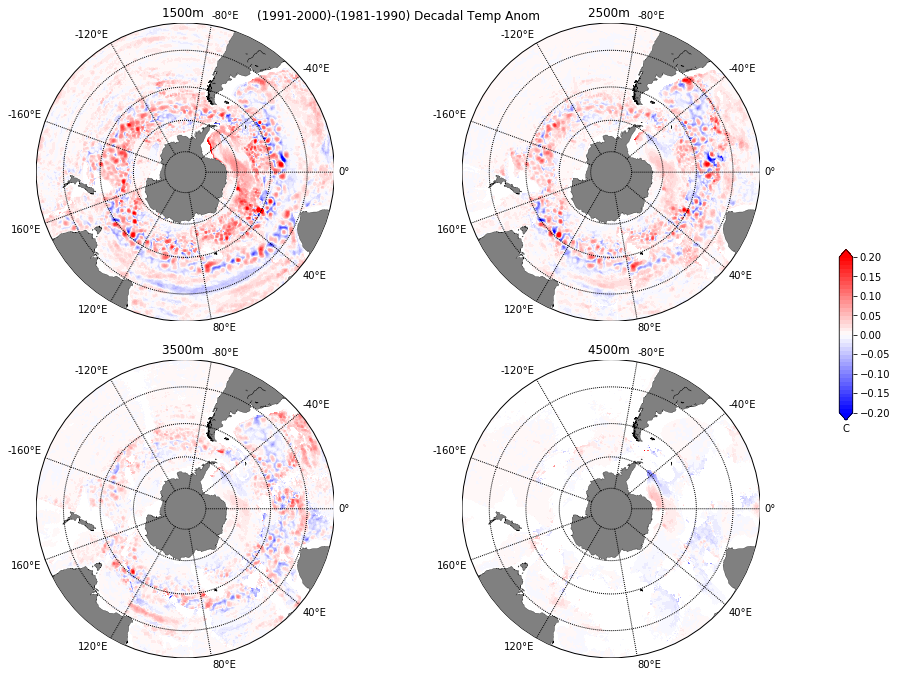

In [6]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.suptitle('(1991-2000)-(1981-1990) Decadal Temp Anom')
clev = np.arange(-.2,.21,.01)
#print clev

st=50
print(st_ocean2[st])

var1=mom01_pert.temp[8:18,st,:,:].mean('time').load()-mom01_cntrl.temp[8:18,st,:,:].mean('time').load()
var2=mom01_pert.temp[18:27,st,:,:].mean('time').load()-mom01_cntrl.temp[18:27,st,:,:].mean('time').load()

plt.subplot(2,2,1)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = mom01.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1500m ')

st=57
print(st_ocean2[st])

var1=mom01_pert.temp[8:18,st,:,:].mean('time').load()-mom01_cntrl.temp[8:18,st,:,:].mean('time').load()
var2=mom01_pert.temp[18:27,st,:,:].mean('time').load()-mom01_cntrl.temp[18:27,st,:,:].mean('time').load()

plt.subplot(2,2,2)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = mom01.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2500m ')

st=62
print(st_ocean2[st])

var1=mom01_pert.temp[8:18,st,:,:].mean('time').load()-mom01_cntrl.temp[8:18,st,:,:].mean('time').load()
var2=mom01_pert.temp[18:27,st,:,:].mean('time').load()-mom01_cntrl.temp[18:27,st,:,:].mean('time').load()

plt.subplot(2,2,3)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = mom01.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('3500m ')

st=68
print(st_ocean2[st])

var1=mom01_pert.temp[8:18,st,:,:].mean('time').load()-mom01_cntrl.temp[8:18,st,:,:].mean('time').load()
var2=mom01_pert.temp[18:27,st,:,:].mean('time').load()-mom01_cntrl.temp[18:27,st,:,:].mean('time').load()

plt.subplot(2,2,4)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = mom01.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('4500m ')

ax3 = plt.axes([0.99,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('C')

plt.tight_layout()

In [20]:
#depth average between 1000-4000m and below 4000m, Fig 3 of Purkey et al., 2016.
#calculate linear ocean warming trends spanning 1981 to 2016

#depth integrate from 1000-4000 and 4000:

print(st_ocean2.shape)
print(st_ocean2[0:46])
print(st_ocean2[46:66])
print(st_ocean2[66:75])

print(mom01_pert.temp.shape)
mom01_pT_0to1=np.zeros((mom01_pert.temp.shape[0],mom01_pert.temp.shape[2],mom01_pert.temp.shape[3]))
mom01_pT_1to4=np.zeros((mom01_pert.temp.shape[0],mom01_pert.temp.shape[2],mom01_pert.temp.shape[3]))
mom01_pT_4to6=np.zeros((mom01_pert.temp.shape[0],mom01_pert.temp.shape[2],mom01_pert.temp.shape[3]))
print(mom01_pT_1to4.shape)

for t in range(mom01_pert.temp.shape[0]):
    print(t)
    
    mom01_pT_0to1[t,:,:]=np.sum(mom01_pert.temp[t,0:46,:,:].load()*dzt2[0,0:46,0:1351,:],axis=0)/np.sum(dzt2[0,0:46,0:1351,:],axis=0)
    mom01_pT_1to4[t,:,:]=np.sum(mom01_pert.temp[t,46:66,:,:].load()*dzt2[0,46:66,0:1351,:],axis=0)/np.sum(dzt2[0,46:66,0:1351,:],axis=0)
    mom01_pT_4to6[t,:,:]=np.sum(mom01_pert.temp[t,66:75,:,:].load()*dzt2[0,66:75,0:1351,:],axis=0)/np.sum(dzt2[0,66:75,0:1351,:],axis=0)
    
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/','pT_0to1.npy')
a=np.save(of,mom01_pT_0to1)
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/','pT_1to4.npy')
a=np.save(of,mom01_pT_1to4)
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/','pT_4to6.npy')
a=np.save(of,mom01_pT_4to6)




(75,)
[5.41280765e-01 1.68073468e+00 2.93995265e+00 4.33152149e+00
 5.86935042e+00 7.56880992e+00 9.44688496e+00 1.15223444e+01
 1.38159279e+01 1.63505526e+01 1.91515408e+01 2.22468718e+01
 2.56674591e+01 2.94474571e+01 3.36245984e+01 3.82405659e+01
 4.33414022e+01 4.89779610e+01 5.52064020e+01 6.20887357e+01
 6.96934198e+01 7.80960121e+01 8.73798840e+01 9.76369969e+01
 1.08968745e+02 1.21486866e+02 1.35314420e+02 1.50586834e+02
 1.67453006e+02 1.86076460e+02 2.06636535e+02 2.29329581e+02
 2.54370129e+02 2.81991982e+02 3.12449164e+02 3.46016618e+02
 3.82990565e+02 4.23688336e+02 4.68447515e+02 5.17624173e+02
 5.71589915e+02 6.30727513e+02 6.95424821e+02 7.66066799e+02
 8.43025513e+02 9.26648199e+02]
[1017.24370768 1115.06797498 1220.30949515 1333.07609258 1453.38443981
 1581.15373743 1716.20465096 1858.26402924 2006.97519805 2161.91288246
 2322.60123414 2488.53315123 2659.18911348 2834.05406813 3012.63138121
 3194.45338659 3379.08852049 3566.14536241 3755.27409766 3946.16599027]
[4138.

In [7]:
print(mom01_cntrl.temp.shape)
mom01_cT_0to1=np.zeros((mom01_cntrl.temp.shape[0],mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_cT_1to4=np.zeros((mom01_cntrl.temp.shape[0],mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_cT_4to6=np.zeros((mom01_cntrl.temp.shape[0],mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
print(mom01_cT_1to4.shape)

for t in range(mom01_cntrl.temp.shape[0]):
    print(t)
    
    mom01_cT_0to1[t,:,:]=np.sum(mom01_cntrl.temp[t,0:46,:,:].load()*dzt2[0,0:46,0:1351,:],axis=0)/np.sum(dzt2[0,0:46,0:1351,:],axis=0)
    mom01_cT_1to4[t,:,:]=np.sum(mom01_cntrl.temp[t,46:66,:,:].load()*dzt2[0,46:66,0:1351,:],axis=0)/np.sum(dzt2[0,46:66,0:1351,:],axis=0)
    mom01_cT_4to6[t,:,:]=np.sum(mom01_cntrl.temp[t,66:75,:,:].load()*dzt2[0,66:75,0:1351,:],axis=0)/np.sum(dzt2[0,66:75,0:1351,:],axis=0)
    
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_cp_ann/','cT_0to1.npy')
a=np.save(of,mom01_cT_0to1)
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_cp_ann/','cT_1to4.npy')
a=np.save(of,mom01_cT_1to4)
of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_cp_ann/','cT_4to6.npy')
a=np.save(of,mom01_cT_4to6)

(27, 75, 1351, 3600)
(27, 1351, 3600)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [7]:
NYFCntrlDir = '/g/data/hh5/tmp/pas561/kds75_cp_ann/'
NYFPertDir = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr/'

of=os.path.join(NYFCntrlDir,'cT_0to1.npy')
mom01_cT_0to1=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_1to4.npy')
mom01_cT_1to4=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_4to6.npy')
mom01_cT_4to6=np.load(of)  

print(mom01_cT_1to4.shape)
print(mom01_cT_4to6.shape)

of=os.path.join(NYFPertDir,'pT_0to1.npy')
mom01_pT_0to1=np.load(of)

of=os.path.join(NYFPertDir,'pT_1to4.npy')
mom01_pT_1to4=np.load(of)

of=os.path.join(NYFPertDir,'pT_4to6.npy')
mom01_pT_4to6=np.load(of)  

print(mom01_pT_1to4.shape)
print(mom01_pT_4to6.shape)


(27, 1351, 3600)
(27, 1351, 3600)
(29, 1351, 3600)
(29, 1351, 3600)


In [23]:
#calc dT/dt
#cyrs=np.arange(1970,2017,1)
pyrs=np.arange(1973,1973+27,1)

#calc linear trend in C/s since 1981-2000 (8 years from 1973) 
print(pyrs)
print(pyrs[8:28])
print(pyrs[28:44])

[1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999]
[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999]
[]


In [15]:
#calc dT/dt
#cyrs=np.arange(1970,2017,1)
pyrs=np.arange(1973,1973+27,1)

#calc linear trend in C/s since 1981-2000 (8 years from 1973) 
#print cyrs[11:31]
print(pyrs[8:28])

wp_os=3

mom01_tr81to00_pT_0to1=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr81to00_cT_0to1=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr81to00_pT_1to4=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr81to00_cT_1to4=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr81to00_pT_4to6=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))
mom01_tr81to00_cT_4to6=np.zeros((mom01_cntrl.temp.shape[2],mom01_cntrl.temp.shape[3]))


for j in range(0,mom01_cntrl.temp.shape[2]):
    #print j
    
    mom01_tr81to00_pT_0to1[j,:]=np.polyfit(range(19), mom01_pT_0to1[8:27,j,:],1)[0,:]
    mom01_tr81to00_cT_0to1[j,:]=np.polyfit(range(19), mom01_cT_0to1[8:27,j,:],1)[0,:]
     
    mom01_tr81to00_pT_1to4[j,:]=np.polyfit(range(19), mom01_pT_1to4[8:27,j,:],1)[0,:]
    mom01_tr81to00_cT_1to4[j,:]=np.polyfit(range(19), mom01_cT_1to4[8:27,j,:],1)[0,:]
    
    mom01_tr81to00_pT_4to6[j,:]=np.polyfit(range(19), mom01_pT_4to6[8:27,j,:],1)[0,:]
    mom01_tr81to00_cT_4to6[j,:]=np.polyfit(range(19), mom01_cT_4to6[8:27,j,:],1)[0,:]    
    

[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999]


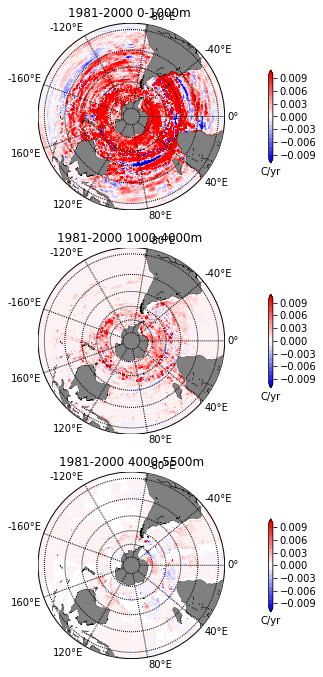

In [10]:
#plot dT/dt K/yr heating trend
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('(1991-2000)-(1981-1990) Decadal Temp Anom')

clev = np.arange(-.01,.011,.001)
#print clev


clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,1,1)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pT_0to1-mom01_tr81to00_cT_0to1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 0-1000m ')


plt.subplot(3,1,2)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pT_1to4-mom01_tr81to00_cT_1to4, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 1000-4000m ')

#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

clev = np.arange(-.01,.011,.001)

plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pT_4to6-mom01_tr81to00_cT_4to6,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('C/yr')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 4000-5500m')


plt.tight_layout()

In [ ]:
#of=os.path.join('/g/data3/hh5/tmp/pas561/kds75_cp_ann/','cT_4to6.npy')
#a=np.save(of,mom01_cT_4to6)

In [8]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap


In [9]:
#midpoint his should be  1 - vmax / (vmax + abs(vmin))
#mp=1 - .051/(.051 + .01)
#print(mp)
#print(st_ocean[-1:])
#print(st_ocean2[-1:])

mp=1 - .35/(.35 + .15)
print(mp)
orig_cmap = matplotlib.cm.bwr#coolwarm
shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shifted')
print(orig_cmap)
print(shifted_cmap)

0.3


[-1.50000000e-01 -1.00000000e-01 -5.00000000e-02  2.77555756e-17
  5.00000000e-02  1.00000000e-01  1.50000000e-01  2.00000000e-01
  2.50000000e-01  3.00000000e-01]
0.3


NameError: name 'geolon_t' is not defined

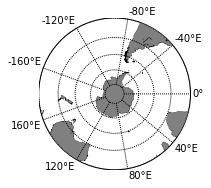

In [10]:
#plot dT/dt K/yr heating trend
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('(1991-2000)-(1981-1990) Decadal Temp Anom')

clev = np.arange(-.15,.35,.05)
#clev = np.arange(-0.3,.35,.05)
print(clev)

#midpoint his should be  1 - vmax / (vmax + abs(vmin))
mp=1 - .35/(.35 + .15)
print(mp)
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shrunk')#name='shifted'
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')
#shifted_cmap=matplotlib.cm.coolwarm

plt.subplot(3,3,1)
map = Basemap(projection='spstere',boundinglat=-20,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to00_pT_0to1*10-np_tr81to00_cT_0to1*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('a) MOM025_NP 0-1 km ',pad=20,loc='left')

plt.subplot(3,3,2)
map = Basemap(projection='spstere',boundinglat=-20,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr81to00_pT_0to1*10-nonp_tr81to00_cT_0to1*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('b) MOM025_NoNP 0-1 km',pad=20,loc='left')


plt.subplot(3,3,3)
map = Basemap(projection='spstere',boundinglat=-20,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pT_0to1*10-mom01_tr81to00_cT_0to1*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('c) MOM01 0-1 km',pad=20,loc='left')

ax3 = plt.axes([0.95,0.7,0.01,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('$^\circ$C/Decade')

#clev = np.arange(-.05,.15,.01)
#clev = np.arange(-.15,.16,.01)
#print(clev)
#midpoint his should be  1 - vmax / (vmax + abs(vmin))
#mp=1 - .15/(.15 + .05)

clev = np.arange(-.05,.11,.01)
print(clev)
#midpoint his should be  1 - vmax / (vmax + abs(vmin))
mp=1 - .11/(.11 + .05)

print(mp)
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shifted')
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')
#shifted_cmap= matplotlib.cm.coolwarm

plt.subplot(3,3,4)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to00_pT_1to4*10-np_tr81to00_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('d) MOM025_NP 1-4 km ',pad=20,loc='left')

plt.subplot(3,3,5)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr81to00_pT_1to4*10-nonp_tr81to00_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('e) MOM025_NoNP 1-4 km',pad=20,loc='left')


plt.subplot(3,3,6)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pT_1to4*10-mom01_tr81to00_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('f) MOM01 1-4 km',pad=20,loc='left')

ax3 = plt.axes([0.95,0.38,0.01,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('$^\circ$C/Decade')

#clev = np.arange(-.1,.11,.01)
clev = np.arange(-.05,.11,.01)
print(clev)

#midpoint his should be  1 - vmax / (vmax + abs(vmin))
mp=1 - .11/(.11 + .05)
print(mp)
orig_cmap = matplotlib.cm.coolwarm
#shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shifted')
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')
#shifted_cmap=matplotlib.cm.coolwarm

plt.subplot(3,3,7)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to00_pT_4to6*10-np_tr81to00_cT_4to6*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('g) MOM025_NP >4 km ',pad=20,loc='left')

plt.subplot(3,3,8)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr81to00_pT_4to6*10-nonp_tr81to00_cT_4to6*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('h) MOM025_NoNP >4 km',pad=20,loc='left')


plt.subplot(3,3,9)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pT_4to6*10-mom01_tr81to00_cT_4to6*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('i) MOM01 >4km',pad=20,loc='left')

ax3 = plt.axes([0.95,0.05,0.01,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('$^\circ$C/Decade')


plt.tight_layout()

of = '/g/data1/v45/pas561/mom/archive/wp2_figs/Fig_TTrend.png'
plt.savefig(of,dpi=220)

[-2.00000000e-01 -1.50000000e-01 -1.00000000e-01 -5.00000000e-02
 -5.55111512e-17  5.00000000e-02  1.00000000e-01  1.50000000e-01
  2.00000000e-01]
[-1.00000000e-01 -9.00000000e-02 -8.00000000e-02 -7.00000000e-02
 -6.00000000e-02 -5.00000000e-02 -4.00000000e-02 -3.00000000e-02
 -2.00000000e-02 -1.00000000e-02 -5.55111512e-17  1.00000000e-02
  2.00000000e-02  3.00000000e-02  4.00000000e-02  5.00000000e-02
  6.00000000e-02  7.00000000e-02  8.00000000e-02  9.00000000e-02
  1.00000000e-01]
[-1.00000000e-01 -9.00000000e-02 -8.00000000e-02 -7.00000000e-02
 -6.00000000e-02 -5.00000000e-02 -4.00000000e-02 -3.00000000e-02
 -2.00000000e-02 -1.00000000e-02 -5.55111512e-17  1.00000000e-02
  2.00000000e-02  3.00000000e-02  4.00000000e-02  5.00000000e-02
  6.00000000e-02  7.00000000e-02  8.00000000e-02  9.00000000e-02
  1.00000000e-01]


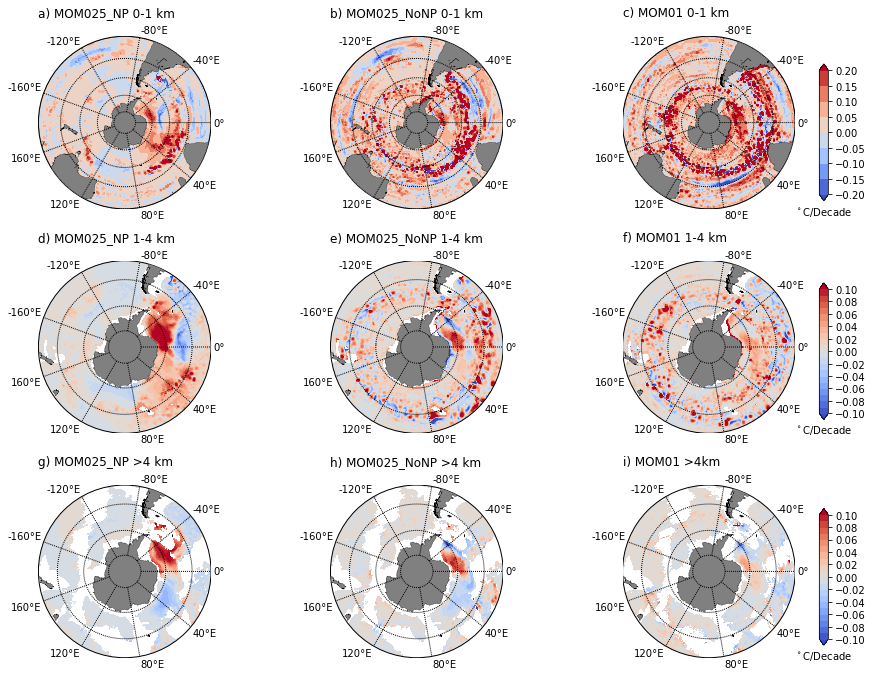

In [24]:
#plot dT/dt K/yr heating trend
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('(1991-2000)-(1981-1990) Decadal Temp Anom')

#clev = np.arange(-.15,.35,.05)
clev = np.arange(-0.2,.25,.05)
print(clev)

#midpoint his should be  1 - vmax / (vmax + abs(vmin))
#mp=1 - .35/(.35 + .15)
#print(mp)
#orig_cmap = matplotlib.cm.coolwarm
#shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shrunk')#name='shifted'
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')
shifted_cmap=matplotlib.cm.coolwarm

plt.subplot(3,3,1)
map = Basemap(projection='spstere',boundinglat=-20,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to00_pT_0to1*10-np_tr81to00_cT_0to1*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('a) MOM025_NP 0-1 km ',pad=20,loc='left')

plt.subplot(3,3,2)
map = Basemap(projection='spstere',boundinglat=-20,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr81to00_pT_0to1*10-nonp_tr81to00_cT_0to1*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('b) MOM025_NoNP 0-1 km',pad=20,loc='left')


plt.subplot(3,3,3)
map = Basemap(projection='spstere',boundinglat=-20,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pT_0to1*10-mom01_tr81to00_cT_0to1*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('c) MOM01 0-1 km',pad=20,loc='left')

ax3 = plt.axes([0.95,0.7,0.01,0.2])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('$^\circ$C/Decade')

#clev = np.arange(-.05,.15,.01)
clev = np.arange(-.1,.11,.01)
print(clev)

#midpoint his should be  1 - vmax / (vmax + abs(vmin))
#mp=1 - .15/(.15 + .05)
#print(mp)
#orig_cmap = matplotlib.cm.coolwarm
#shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shifted')
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')
shifted_cmap= matplotlib.cm.coolwarm

plt.subplot(3,3,4)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to00_pT_1to4*10-np_tr81to00_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('d) MOM025_NP 1-4 km ',pad=20,loc='left')

plt.subplot(3,3,5)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr81to00_pT_1to4*10-nonp_tr81to00_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('e) MOM025_NoNP 1-4 km',pad=20,loc='left')


plt.subplot(3,3,6)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pT_1to4*10-mom01_tr81to00_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('f) MOM01 1-4 km',pad=20,loc='left')

ax3 = plt.axes([0.95,0.38,0.01,0.2])
cb = plt.colorbar(p1,cax=ax3,ticks=np.arange(-.1,.12,.02),orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('$^\circ$C/Decade')

clev = np.arange(-.1,.11,.01)
#clev = np.arange(-.05,.15,.01)
print(clev)

#midpoint his should be  1 - vmax / (vmax + abs(vmin))
#mp=1 - .15/(.15 + .05)
#print(mp)
#orig_cmap = matplotlib.cm.coolwarm
#shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shifted')
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')
shifted_cmap=matplotlib.cm.coolwarm

plt.subplot(3,3,7)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr81to00_pT_4to6*10-np_tr81to00_cT_4to6*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('g) MOM025_NP >4 km ',pad=20,loc='left')

plt.subplot(3,3,8)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr81to00_pT_4to6*10-nonp_tr81to00_cT_4to6*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('h) MOM025_NoNP >4 km',pad=20,loc='left')


plt.subplot(3,3,9)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t2[0:1351,:],geolat_t2[0:1351,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,mom01_tr81to00_pT_4to6*10-mom01_tr81to00_cT_4to6*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('i) MOM01 >4km',pad=20,loc='left')

ax3 = plt.axes([0.95,0.05,0.01,0.2])
cb = plt.colorbar(p1,cax=ax3,ticks=np.arange(-.1,.12,.02),orientation='vertical',shrink = 0.5)
cb.ax.set_xlabel('$^\circ$C/Decade')


plt.tight_layout()

of = '/g/data1/v45/pas561/mom/archive/wp2_figs/Fig_TTrend_v2.png'
plt.savefig(of,dpi=220)

[-3.00000000e-01 -2.50000000e-01 -2.00000000e-01 -1.50000000e-01
 -1.00000000e-01 -5.00000000e-02 -5.55111512e-17  5.00000000e-02
  1.00000000e-01  1.50000000e-01  2.00000000e-01  2.50000000e-01
  3.00000000e-01]
[-1.00000000e-01 -9.00000000e-02 -8.00000000e-02 -7.00000000e-02
 -6.00000000e-02 -5.00000000e-02 -4.00000000e-02 -3.00000000e-02
 -2.00000000e-02 -1.00000000e-02 -5.55111512e-17  1.00000000e-02
  2.00000000e-02  3.00000000e-02  4.00000000e-02  5.00000000e-02
  6.00000000e-02  7.00000000e-02  8.00000000e-02  9.00000000e-02
  1.00000000e-01]
[-6.00000000e-02 -5.00000000e-02 -4.00000000e-02 -3.00000000e-02
 -2.00000000e-02 -1.00000000e-02  1.38777878e-17  1.00000000e-02
  2.00000000e-02  3.00000000e-02  4.00000000e-02  5.00000000e-02
  6.00000000e-02]


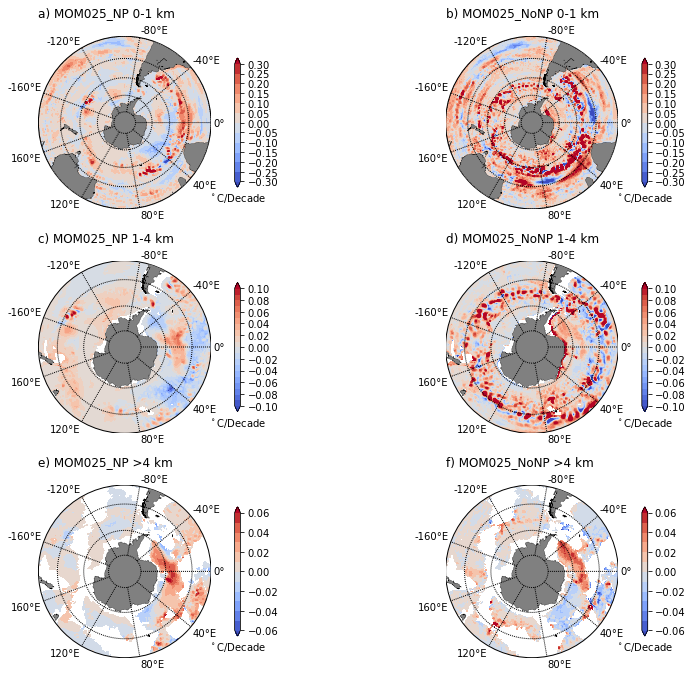

In [33]:
#plot dT/dt K/yr heating trend
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('(1991-2000)-(1981-1990) Decadal Temp Anom')

#clev = np.arange(-.15,.35,.05)
clev = np.arange(-0.3,.35,.05)
print(clev)

#midpoint his should be  1 - vmax / (vmax + abs(vmin))
#mp=1 - .35/(.35 + .15)
#print(mp)
#orig_cmap = matplotlib.cm.coolwarm
#shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shrunk')#name='shifted'
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')
shifted_cmap=matplotlib.cm.coolwarm

plt.subplot(3,2,1)
map = Basemap(projection='spstere',boundinglat=-20,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr00to17_pT_0to1*10-np_tr00to17_cT_0to1*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(ticks=np.arange(-0.3,.35,.05),orientation='vertical',shrink = 0.75)
cb.ax.set_xlabel('$^\circ$C/Decade')
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('a) MOM025_NP 0-1 km ',pad=20,loc='left')

plt.subplot(3,2,2)
map = Basemap(projection='spstere',boundinglat=-20,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr00to17_pT_0to1*10-nonp_tr00to17_cT_0to1*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(ticks=np.arange(-0.3,.35,.05),orientation='vertical',shrink = 0.75)
cb.ax.set_xlabel('$^\circ$C/Decade')
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('b) MOM025_NoNP 0-1 km',pad=20,loc='left')

#ax3 = plt.axes([0.95,0.7,0.01,0.2])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('$^\circ$C/Decade')

#clev = np.arange(-.05,.15,.01)
clev = np.arange(-.1,.11,.01)
print(clev)

#midpoint his should be  1 - vmax / (vmax + abs(vmin))
#mp=1 - .15/(.15 + .05)
#print(mp)
#orig_cmap = matplotlib.cm.coolwarm
#shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shifted')
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')
shifted_cmap= matplotlib.cm.coolwarm

plt.subplot(3,2,3)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr00to17_pT_1to4*10-np_tr00to17_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(ticks=np.arange(-.1,.12,.02),orientation='vertical',shrink = 0.75)
cb.ax.set_xlabel('$^\circ$C/Decade')
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('c) MOM025_NP 1-4 km ',pad=20,loc='left')

plt.subplot(3,2,4)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr00to17_pT_1to4*10-nonp_tr00to17_cT_1to4*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(ticks=np.arange(-.1,.12,.02),orientation='vertical',shrink = 0.75)
cb.ax.set_xlabel('$^\circ$C/Decade')
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('d) MOM025_NoNP 1-4 km',pad=20,loc='left')

#ax3 = plt.axes([0.95,0.38,0.01,0.2])
#cb = plt.colorbar(p1,cax=ax3,ticks=np.arange(-.1,.12,.02),orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('$^\circ$C/Decade')

clev = np.arange(-.06,.061,.01)
#clev = np.arange(-.05,.15,.01)
print(clev)

#midpoint his should be  1 - vmax / (vmax + abs(vmin))
#mp=1 - .15/(.15 + .05)
#print(mp)
#orig_cmap = matplotlib.cm.coolwarm
#shifted_cmap = shiftedColorMap(orig_cmap,midpoint=mp, name='shifted')
#shrunk_cmap = shiftedColorMap(orig_cmap, start=0.15, midpoint=0.75, stop=0.85, name='shrunk')
shifted_cmap=matplotlib.cm.coolwarm

plt.subplot(3,2,5)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,np_tr00to17_pT_4to6*10-np_tr00to17_cT_4to6*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(ticks=np.arange(-.06,.08,.02),orientation='vertical',shrink = 0.75)
cb.ax.set_xlabel('$^\circ$C/Decade')
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('e) MOM025_NP >4 km ',pad=20,loc='left')

plt.subplot(3,2,6)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,nonp_tr00to17_pT_4to6*10-nonp_tr00to17_cT_4to6*10, cmap=shifted_cmap, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(ticks=np.arange(-.06,.08,.02),orientation='vertical',shrink = 0.75)
cb.ax.set_xlabel('$^\circ$C/Decade')
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C/yr')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('f) MOM025_NoNP >4 km',pad=20,loc='left')

#ax3 = plt.axes([0.95,0.05,0.01,0.2])
#cb = plt.colorbar(p1,cax=ax3,ticks=np.arange(-.1,.12,.02),orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('$^\circ$C/Decade')


plt.tight_layout()

of = '/g/data1/v45/pas561/mom/archive/wp2_figs/Fig_TTrend_v3.png'
plt.savefig(of,dpi=220)